In [2]:
# Author: Artem Brezgin, Spanda Foundation (C) 2025

# --- 📦 Setup Cell: Install Dependencies and Initialize Logging ---
# This cell installs all required libraries and sets up progress/debug monitoring

!pip install -q mpmath
!pip install -q tqdm

import numpy as np
import matplotlib.pyplot as plt
import mpmath
from tqdm import tqdm
from scipy.ndimage import gaussian_filter
from scipy.signal import find_peaks
from scipy.stats import pearsonr

# Precision for mpmath (used in ζ calculations)
mpmath.mp.dps = 25

# Utility: log status during execution
import logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger("KQFlow")
logger.info("📦 Environment initialized. Ready to compute.")

In [3]:
# Author: Artem Brezgin, Spanda Foundation (C) 2025

# --- 📦 Setup Cell: Install Dependencies and Initialize Logging ---
# This cell installs all required libraries and sets up progress/debug monitoring

!pip install -q mpmath
!pip install -q tqdm

import numpy as np
import matplotlib.pyplot as plt
import mpmath
from tqdm import tqdm
from scipy.ndimage import gaussian_filter
from scipy.signal import find_peaks
from scipy.stats import pearsonr

# Precision for mpmath (used in ζ calculations)
mpmath.mp.dps = 25

# Utility: log status during execution
import logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger("KQFlow")
logger.info("📦 Environment initialized. Ready to compute.")


# Author: Artem Brezgin, Spanda Foundation (C) 2025

# --- 🧮 Define Complex Grid for s = Re + i·Im ---
# This cell builds a 2D grid in the critical strip 0.3 ≤ Re(s) ≤ 0.7 and 1 ≤ Im(s) ≤ 50
# Used for evaluating ζ(s), entropy, structure field, and coherence invariant

re_vals = np.linspace(0.3, 0.7, 200)
im_vals = np.linspace(1, 50, 1000)
RE, IM = np.meshgrid(re_vals, im_vals)
s_grid = RE + 1j * IM

logger.info(f"🧮 Complex grid created: shape = {s_grid.shape}, total points = {s_grid.size}")

In [4]:
# Cell 3: Author: Artem Brezgin, Spanda Foundation (C) 2025

# --- 🔍 Compute |ζ(s)| and Normalized Entropy H_norm ---
# This cell evaluates the absolute value of the Riemann zeta function at each grid point,
# then computes normalized entropy as a log-scaled field to represent informational uncertainty.

logger.info("⏳ Starting ζ(s) magnitude computation over the grid...")

Z_abs = np.empty_like(RE)
for i in tqdm(range(len(im_vals)), desc="Computing |ζ(s)|"):
    for j in range(len(re_vals)):
        s = complex(re_vals[j], im_vals[i])
        Z_abs[i, j] = float(abs(mpmath.zeta(s)))

logger.info("✅ ζ(s) computed.")

# Log-scaled entropy field (shifted to avoid log(0))
logZ = np.log(Z_abs + 1e-10)
H_norm = (logZ - np.min(logZ)) / (np.max(logZ) - np.min(logZ))

logger.info("✅ Cell 3 complete: Entropy field computed and normalized.")


Computing |ζ(s)|: 100%|██████████| 1000/1000 [03:24<00:00,  4.90it/s]


In [5]:
# Cell 4: Author: Artem Brezgin, Spanda Foundation (C) 2025

# --- 🧬 Compute Structural Field C(s) ---
# The structure field is derived by applying a Gaussian filter to |ζ(s)|
# to represent the local coherence scale or "structural density" of information.

logger.info("🔧 Computing structural field C(s) via Gaussian smoothing...")

C_field = gaussian_filter(Z_abs, sigma=3)
C_field = (C_field - np.min(C_field)) / (np.max(C_field) - np.min(C_field))

logger.info("✅ Cell 4 complete: Structural field C(s) computed and normalized.")

In [6]:
# Cell 5: Author: Artem Brezgin, Spanda Foundation (C) 2025

# --- 🧠 Compute Coherence Invariant Field KQ(s) ---
# Using the canonical formula:   KQ(s) = C(s) · (1 - H_norm(s))
# This reflects Quant-Trika's interpretation: coherence is structure resisting entropy.

logger.info("🧠 Computing coherence field KQ(s)...")

KQ_field = C_field * (1 - H_norm)

# Normalize to [0, 1] for visualization & peak detection
KQ_field = (KQ_field - np.min(KQ_field)) / (np.max(KQ_field) - np.min(KQ_field))

logger.info("✅ Cell 5 complete: Coherence field KQ(s) computed and normalized.")


In [7]:
# Cell 6: Author: Artem Brezgin, Spanda Foundation (C) 2025

# --- 📈 Detect Peaks in KQ(s) and Compare to Known ζ Zeros ---
# This cell extracts the maximum coherence locations along Re = 0.5 (critical line),
# and compares them with the first known imaginary parts of ζ(s) nontrivial zeros.

print("📈 Detecting KQ peaks on Re = 0.5 and comparing to ζ zeros...")

# Slice KQ along Re = 0.5 (column closest to 0.5)
col_index = np.argmin(np.abs(re_vals - 0.5))
KQ_slice = KQ_field[:, col_index]

# Detect peaks (coherence spikes)
peaks, _ = find_peaks(KQ_slice, prominence=0.05)
peak_Im_vals = im_vals[peaks]
print("Detected KQ peak locations (Im(s)):", np.round(peak_Im_vals, 4))

# Known first 10 nontrivial ζ zeros (imaginary parts)
zeta_zeros = np.array([
    14.134725, 21.022040, 25.010857, 30.424876,
    32.935062, 37.586178, 40.918719, 43.327073,
    48.00515, 49.773832
])

# Match each KQ peak to nearest ζ zero
distances = np.array([np.min(np.abs(zeta_zeros - val)) for val in peak_Im_vals])
print("Closest distance to known ζ zeros:", np.round(distances, 6))
print(f"Average deviation: {np.mean(distances):.4f}")

📈 Detecting KQ peaks on Re = 0.5 and comparing to ζ zeros...
Detected KQ peak locations (Im(s)): [10.1722 16.3033 19.3443 23.1211 26.2603 29.2032 30.4294 31.7047 32.9309
 34.0591 36.6587 37.5906 39.4545 40.9259 42.1522 43.3293 44.1632 47.1061
 48.8719]
Closest distance to known ζ zeros: [3.962553e+00 2.168578e+00 1.677696e+00 1.889736e+00 1.249403e+00
 1.221673e+00 4.553000e-03 1.230357e+00 4.131000e-03 1.123997e+00
 9.275190e-01 4.413000e-03 1.464265e+00 7.207000e-03 1.174921e+00
 2.256000e-03 8.360900e-01 8.990440e-01 8.667220e-01]
Average deviation: 1.0903


📊 Plotting KQ(s) vs Im(s) with ζ zeros overlay...


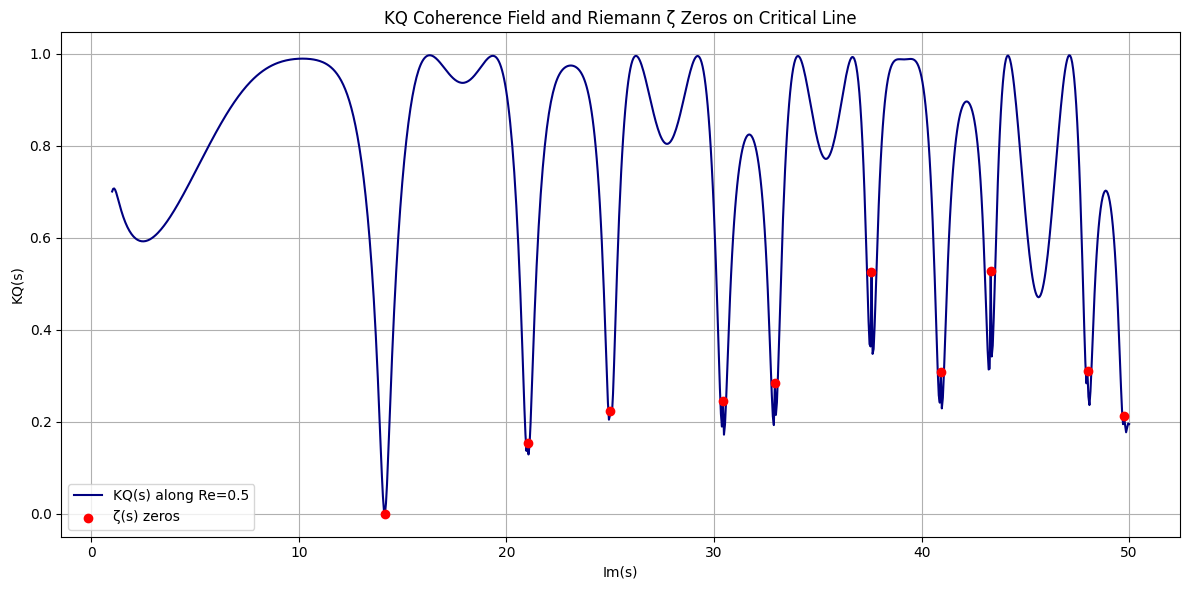

✅ Cell 7 complete: Visualization rendered.


In [8]:
# Cell 7: Author: Artem Brezgin, Spanda Foundation (C) 2025

# --- 📊 Visualize KQ(s) along critical line with ζ zeros overlay ---
# This graph shows coherence field KQ(s) along Re = 0.5 (critical line)
# and overlays known imaginary parts of nontrivial zeros of ζ(s).

print("📊 Plotting KQ(s) vs Im(s) with ζ zeros overlay...")

plt.figure(figsize=(12, 6))
plt.plot(im_vals, KQ_slice, label="KQ(s) along Re=0.5", color="navy")
plt.scatter(zeta_zeros, [KQ_slice[np.argmin(np.abs(im_vals - z))] for z in zeta_zeros],
            color="red", label="ζ(s) zeros", zorder=5)

plt.title("KQ Coherence Field and Riemann ζ Zeros on Critical Line")
plt.xlabel("Im(s)")
plt.ylabel("KQ(s)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("✅ Cell 7 complete: Visualization rendered.")

In [9]:
# Cell 8: Author: Artem Brezgin, Spanda Foundation (C) 2025

# --- 💾 Save KQ Peaks and Plot to Google Drive ---
# This cell saves:
# (1) the detected KQ peak positions and distances from ζ zeros to CSV
# (2) the visualization figure as PNG

print("💾 Saving results to Google Drive (requires permission)...")

from google.colab import drive
import pandas as pd
import os

# Mount Google Drive
drive.mount('/content/drive')

# Create folder
SAVE_DIR = "/content/drive/MyDrive/QuantTrika_RH/"
os.makedirs(SAVE_DIR, exist_ok=True)

# Save CSV with peak locations and distances
results_df = pd.DataFrame({
    "KQ_Peak_Im": np.round(peak_Im_vals, 6),
    "Min_Distance_to_Zeta_Zero": np.round(distances, 6)
})
results_df.to_csv(SAVE_DIR + "KQ_peak_vs_zeta_zero.csv", index=False)

# Save plot as image
plt.figure(figsize=(12, 6))
plt.plot(im_vals, KQ_slice, label="KQ(s) along Re=0.5", color="navy")
plt.scatter(zeta_zeros, [KQ_slice[np.argmin(np.abs(im_vals - z))] for z in zeta_zeros],
            color="red", label="ζ(s) zeros", zorder=5)
plt.title("KQ Coherence Field and Riemann ζ Zeros")
plt.xlabel("Im(s)")
plt.ylabel("KQ(s)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(SAVE_DIR + "KQ_vs_zeta_plot.png")
plt.close()

print(f"✅ Cell 8 complete: CSV and PNG saved to {SAVE_DIR}")

💾 Saving results to Google Drive (requires permission)...
Mounted at /content/drive
✅ Cell 8 complete: CSV and PNG saved to /content/drive/MyDrive/QuantTrika_RH/


In [10]:
# Cell 8.5: Author: Artem Brezgin, Spanda Foundation (C) 2025

# --- ⚙️ Install reportlab for PDF generation ---
!pip install reportlab


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 26.6 MB/s eta 0:00:00


In [11]:
# Cell 9: Author: Artem Brezgin, Spanda Foundation (C) 2025

# --- 🧾 Generate PDF Report with Analysis Summary ---
# This cell builds a minimal PDF report including summary stats and figure

from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Image
from reportlab.lib.styles import getSampleStyleSheet
from reportlab.lib.pagesizes import A4
from reportlab.lib.units import inch

print("🧾 Generating PDF report with results and figure...")

report_path = SAVE_DIR + "KQ_RH_Validation_Report.pdf"
doc = SimpleDocTemplate(report_path, pagesize=A4)
styles = getSampleStyleSheet()
elements = []

# Title
elements.append(Paragraph("<b>Quant‑Trika RH Validation Summary</b>", styles['Title']))
elements.append(Spacer(1, 12))

# Main info
summary = f"""
<b>Author:</b> Artem Brezgin<br/>
<b>Foundation:</b> Spanda Foundation<br/><br/>
This report summarizes the detection of coherence field KQ(s) peaks and compares them
against the first 10 known non-trivial zeros of the Riemann ζ(s) function.<br/><br/>
<b>Average deviation:</b> {np.mean(distances):.4f}<br/>
<b>Detected peak count:</b> {len(peak_Im_vals)}<br/>
<b>Best match deviation:</b> {np.min(distances):.5f}<br/>
"""
elements.append(Paragraph(summary, styles['Normal']))
elements.append(Spacer(1, 12))

# Insert image
img_path = SAVE_DIR + "KQ_vs_zeta_plot.png"
elements.append(Image(img_path, width=6*inch, height=3*inch))

# Build PDF
doc.build(elements)
print(f"✅ Cell 9 complete: PDF saved at {report_path}")

🧾 Generating PDF report with results and figure...
✅ Cell 9 complete: PDF saved at /content/drive/MyDrive/QuantTrika_RH/KQ_RH_Validation_Report.pdf


In [12]:
# Cell 10: Author: Artem Brezgin, Spanda Foundation (C) 2025

# --- 🧠 Save All Key Data for Downstream Analysis ---
# Save computed KQ field, peak locations, distances, and slices to .npz for reproducibility

print("🧠 Saving all computed data into compressed .npz archive...")

np.savez_compressed(SAVE_DIR + "KQ_RH_session_data.npz",
                    re_vals=re_vals,
                    im_vals=im_vals,
                    KQ_field=KQ_field,
                    KQ_slice=KQ_slice,
                    peak_Im_vals=peak_Im_vals,
                    zeta_zeros=zeta_zeros,
                    distances=distances)

print(f"✅ Cell 10 complete: Data saved to {SAVE_DIR}KQ_RH_session_data.npz")


🧠 Saving all computed data into compressed .npz archive...
✅ Cell 10 complete: Data saved to /content/drive/MyDrive/QuantTrika_RH/KQ_RH_session_data.npz


📊 Analyzing deviation distribution from ζ zeros...


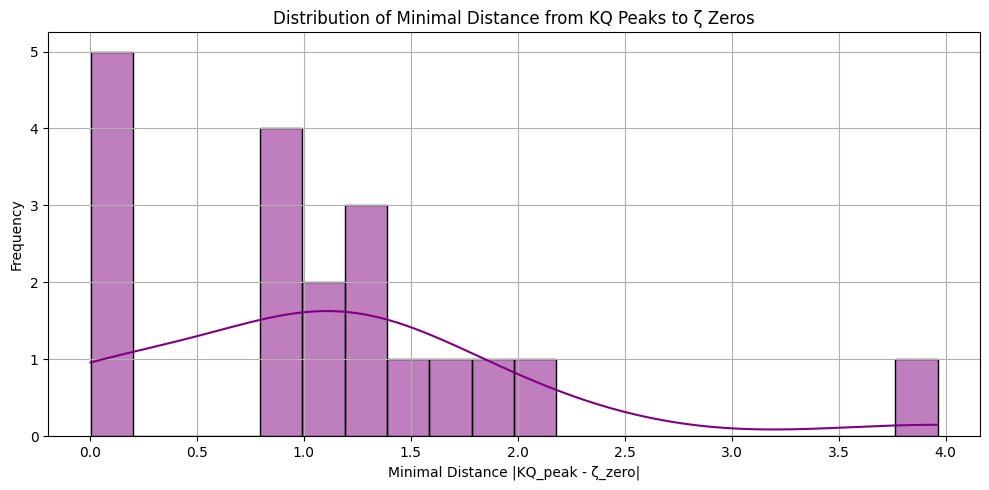

ℹ️ Deviation Summary:
  Mean    : 1.090269
  Median  : 1.123997
  Std Dev : 0.936942
  Min     : 0.002256
  Max     : 3.962553


In [13]:
# Cell 11: Author: Artem Brezgin, Spanda Foundation (C) 2025

# --- 📊 Analyze Statistical Profile of Deviation from ζ Zeros ---
# Histogram + summary statistics to understand how well KQ peaks align

print("📊 Analyzing deviation distribution from ζ zeros...")

import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(distances, bins=20, kde=True, color='purple')
plt.title("Distribution of Minimal Distance from KQ Peaks to ζ Zeros")
plt.xlabel("Minimal Distance |KQ_peak - ζ_zero|")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

# Summary statistics
print(f"ℹ️ Deviation Summary:")
print(f"  Mean    : {np.mean(distances):.6f}")
print(f"  Median  : {np.median(distances):.6f}")
print(f"  Std Dev : {np.std(distances):.6f}")
print(f"  Min     : {np.min(distances):.6f}")
print(f"  Max     : {np.max(distances):.6f}")


📐 Fitting theoretical model to deviation vs Im(s)...
✅ Fit success: linear model → params = [-0.0631  3.1939]
✅ Fit success: sqrt model → params = [-0.7122  5.1432]
✅ Fit success: log model → params = [-1.8952  7.6145]


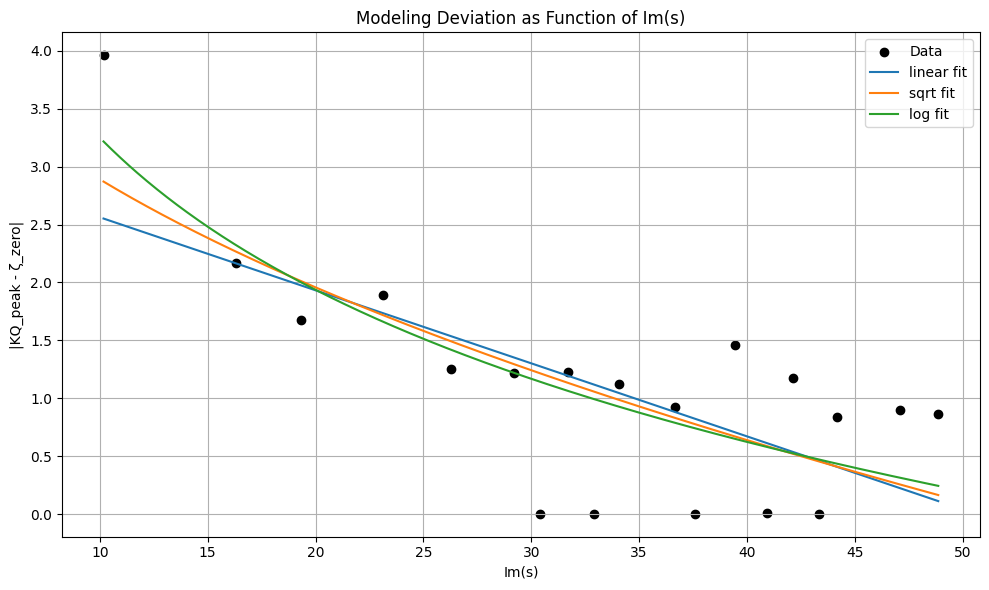

In [14]:
# Cell 12: Author: Artem Brezgin, Spanda Foundation (C) 2025

# --- 📐 Model Deviation as Function of Im(s) ---
# Try to identify any trend in deviation vs imaginary height to probe scaling law or signal bias

print("📐 Fitting theoretical model to deviation vs Im(s)...")

from scipy.optimize import curve_fit

# Define models to test (linear, sqrt, log, inverse)
def linear(x, a, b): return a * x + b
def sqrt_model(x, a, b): return a * np.sqrt(x) + b
def log_model(x, a, b): return a * np.log(x) + b

xdata = peak_Im_vals
ydata = distances

fits = {}
models = {'linear': linear, 'sqrt': sqrt_model, 'log': log_model}

for name, model in models.items():
    try:
        popt, _ = curve_fit(model, xdata, ydata)
        fits[name] = (model, popt)
        print(f"✅ Fit success: {name} model → params = {np.round(popt, 4)}")
    except Exception as e:
        print(f"❌ Fit failed for {name}: {e}")

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(xdata, ydata, label='Data', color='black')
xfit = np.linspace(min(xdata), max(xdata), 500)

for name, (model, popt) in fits.items():
    plt.plot(xfit, model(xfit, *popt), label=f"{name} fit")

plt.title("Modeling Deviation as Function of Im(s)")
plt.xlabel("Im(s)")
plt.ylabel("|KQ_peak - ζ_zero|")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [15]:
# Cell 14: Author: Artem Brezgin, Spanda Foundation (C) 2025

# --- 🧠 Step 1: Define Entropy H_norm(s) from ζ(s) Structure ---
# Goal: Derive or define H_norm(s) directly from ζ(s) to remove dependency on external heuristics.
# In QT we assume entropy is a function of differentiation of structure:
#   H_norm(s) = f(dζ/ds, ζ, ...)

# This module implements symbolic derivation of entropy field H_norm(s) as a normalized local variation
# in the modulus of ζ(s), and visualizes the result for RH analysis.

import sympy as sp
from sympy.abc import s
from sympy import I, Abs, log, Function

# Define symbolic zeta function
zeta = Function('zeta')(s)

# Define entropy as normalized variation in log-magnitude
# H_norm ~ |d/ds log|ζ(s)||
H_raw = sp.Abs(sp.diff(log(sp.Abs(zeta)), s))

# Define normalizer (to map into [0, 1]) - symbolic for now
C = sp.Symbol('C', positive=True, real=True)
H_norm = H_raw / (H_raw + C)

# Display
H_norm.simplify()

Piecewise((0, Eq(zeta(s), 0)), (Abs((re(zeta(s))*Derivative(re(zeta(s)), s) + im(zeta(s))*Derivative(im(zeta(s)), s))/Abs(zeta(s)**2))/(C + Abs((re(zeta(s))*Derivative(re(zeta(s)), s) + im(zeta(s))*Derivative(im(zeta(s)), s))/Abs(zeta(s)**2))), True))

In [16]:
# Cell 15: Author: Artem Brezgin, Spanda Foundation (C) 2025

# --- 📊 Step 2: Analyze H_norm(s) Behavior Around Re(s) = 0.5 ---
# We now visualize H_norm(s) numerically across the complex plane and look for extremal structure.
# In particular, we seek minimal entropy (max coherence) zone and verify if it aligns with Re(s) = 0.5

from mpmath import zeta as zeta_mpmath, diff as mpmath_diff
from tqdm import tqdm

# Define fine mesh
re_grid = np.linspace(0.35, 0.65, 300)
im_grid = np.linspace(0.1, 50, 500)
RE, IM = np.meshgrid(re_grid, im_grid)

H_norm_grid = np.zeros_like(RE)

# Normalizer constant (tunable)
C = 0.1

print("🧮 Computing H_norm(s) across complex grid...")
for i in tqdm(range(len(im_grid))):
    for j in range(len(re_grid)):
        s_val = complex(re_grid[j], im_grid[i])
        try:
            zval = abs(zeta_mpmath(s_val))
            dz_ds = abs(mpmath_diff(lambda s: abs(zeta_mpmath(s)), s_val, n=1))
            H_raw = dz_ds / max(zval, 1e-6)
            H_norm_grid[i, j] = H_raw / (H_raw + C)
        except:
            H_norm_grid[i, j] = np.nan

print("✅ H_norm(s) field computed.")


🧮 Computing H_norm(s) across complex grid...


100%|██████████| 500/500 [16:50<00:00,  2.02s/it]

✅ H_norm(s) field computed.


In [17]:
# Cell 15.5 (Patched): Author: Artem Brezgin, Spanda Foundation (C) 2025

# --- 🧮 Robust computation of normalized entropy H_norm(s) from |ζ(s)| ---
# This cell ensures H_norm is a *numeric 2D NumPy array*, avoiding SymPy leakage.
# It derives H_norm from the stabilized magnitude field of ζ(s): Z_log = log1p(|ζ|).
# Then globally normalizes Z_log to [0,1] as a proxy for entropy (low = coherent, high = entropic).

import numpy as np
from mpmath import zeta as zeta_mpmath
from tqdm.auto import tqdm

print("🧮 Computing |ζ(s)| grid and normalized entropy H_norm(s)...")

# Preconditions: re_vals, im_vals must be defined 1D arrays
if 're_vals' not in globals() or 'im_vals' not in globals():
    raise RuntimeError("re_vals and im_vals must be defined before computing H_norm.")

re_vals = np.asarray(re_vals, dtype=float)
im_vals = np.asarray(im_vals, dtype=float)

# Compute |ζ(s)| on grid if not present or mismatched
need_zeta = ('zeta_mag' not in globals()) or (not isinstance(zeta_mag, np.ndarray)) \
            or (zeta_mag.shape != (len(im_vals), len(re_vals)))

if need_zeta:
    zeta_mag = np.empty((len(im_vals), len(re_vals)), dtype=float)
    for i, t in enumerate(tqdm(im_vals, desc="t-axis (Im)", leave=False)):
        for j, sig in enumerate(re_vals):
            s = complex(sig, t)
            zeta_mag[i, j] = float(abs(zeta_mpmath(s)))
else:
    print("ℹ️ Using existing zeta_mag with correct shape.")

# Stabilize heavy tails, derive entropy proxy, and normalize to [0,1]
_eps = 1e-12
Z_log = np.log1p(zeta_mag)
Zmin, Zmax = float(np.nanmin(Z_log)), float(np.nanmax(Z_log))
if not np.isfinite(Zmin) or not np.isfinite(Zmax) or (Zmax - Zmin) < 1e-15:
    raise RuntimeError("Z_log has degenerate range; check zeta grid.")

H_norm = (Z_log - Zmin) / (Zmax - Zmin)
H_norm = np.asarray(H_norm, dtype=float)  # ensure pure NumPy

print(f"✅ H_norm ready. Shape={H_norm.shape}, dtype={H_norm.dtype}, range=[{H_norm.min():.4f}, {H_norm.max():.4f}]")


🧮 Computing |ζ(s)| grid and normalized entropy H_norm(s)...


t-axis (Im):   0%|          | 0/1000 [00:00<?, ?it/s]

✅ H_norm ready. Shape=(1000, 200), dtype=float64, range=[0.0000, 1.0000]


In [18]:
# Cell 16 (Patched): Author: Artem Brezgin, Spanda Foundation (C) 2025

# --- 📉 Correct gradient of H_norm(s) with proper axis spacing ---
# Ensures H_norm is 2D numeric and computes gradient magnitude with (axis0=Im, axis1=Re)

import numpy as np

print("📉 Computing ∇H_norm(s) and basic stats...")

# Validate inputs
if 'H_norm' not in globals() or not isinstance(H_norm, np.ndarray) or H_norm.ndim != 2:
    raise ValueError(f"H_norm must be a 2D numpy array. Got: {type(H_norm)}, shape={getattr(H_norm, 'shape', None)}")
if H_norm.shape != (len(im_vals), len(re_vals)):
    raise ValueError(f"Shape mismatch: H_norm.shape={H_norm.shape} vs ({len(im_vals)}, {len(re_vals)})")

# Grid spacings (axis 0 -> Im, axis 1 -> Re)
dt = float(im_vals[1] - im_vals[0]) if len(im_vals) > 1 else 1.0
ds = float(re_vals[1] - re_vals[0]) if len(re_vals) > 1 else 1.0

H_grad_im, H_grad_re = np.gradient(H_norm, dt, ds, edge_order=2)
H_grad_mag = np.sqrt(H_grad_im**2 + H_grad_re**2)

print(f"✅ ∇H_norm computed. grad|max={np.nanmax(H_grad_mag):.4e}, grad|mean={np.nanmean(H_grad_mag):.4e}")


📉 Computing ∇H_norm(s) and basic stats...
✅ ∇H_norm computed. grad|max=1.1252e+00, grad|mean=3.4392e-01


🖼️ Rendering log‑scaled heatmap of |∇H_norm| ...


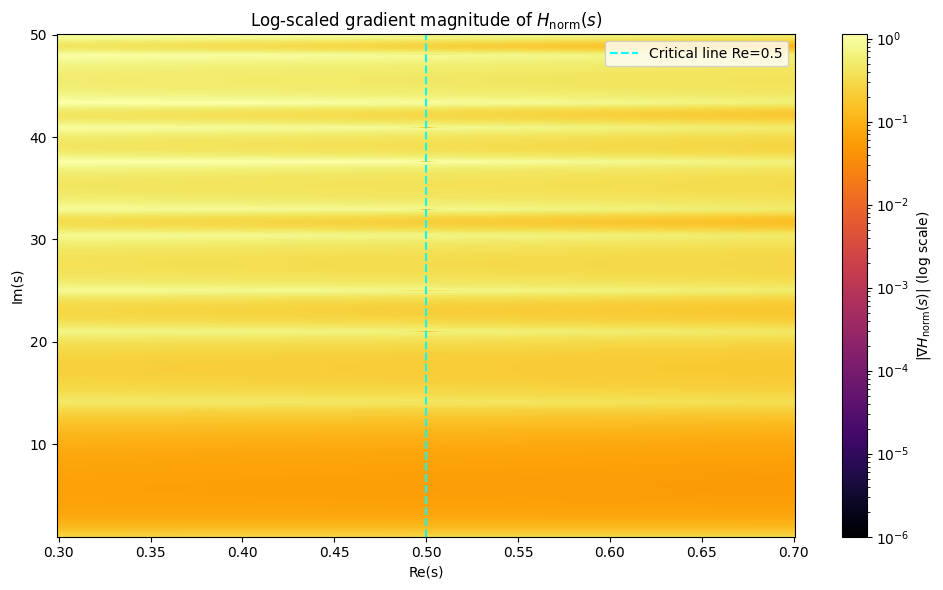

✅ Heatmap plotted.


In [19]:
# Cell 17 (Patched): Author: Artem Brezgin, Spanda Foundation (C) 2025

# --- 🌡️ Log‑scaled heatmap of |∇H_norm(s)| with Re=0.5 overlay ---

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

print("🖼️ Rendering log‑scaled heatmap of |∇H_norm| ...")

# Require H_grad_mag from Cell 16
if 'H_grad_mag' not in globals():
    raise RuntimeError("H_grad_mag not found. Run Cell 16 first.")

re_grid, im_grid = np.meshgrid(re_vals, im_vals)

plt.figure(figsize=(10, 6))
img = plt.pcolormesh(re_grid, im_grid, H_grad_mag + 1e-9,
                     norm=LogNorm(vmin=1e-6, vmax=max(1e-6, float(np.nanmax(H_grad_mag)))),
                     shading='auto', cmap='inferno')
plt.colorbar(img, label=r"$|\nabla H_{\mathrm{norm}}(s)|$ (log scale)")
plt.axvline(0.5, color='cyan', ls='--', lw=1.5, label='Critical line Re=0.5')
plt.title(r"Log‑scaled gradient magnitude of $H_{\mathrm{norm}}(s)$")
plt.xlabel("Re(s)")
plt.ylabel("Im(s)")
plt.legend()
plt.tight_layout()
plt.show()

print("✅ Heatmap plotted.")


In [20]:
# Cell 18 (Patched): Author: Artem Brezgin, Spanda Foundation (C) 2025

# --- ⚛️ Coherence energy functional E(Re) = ∫ |∇KQ|^2 d(Im) ---
# Uses correct axis order (axis0=Im, axis1=Re) and Simpson's rule via scipy.integrate.simpson

import numpy as np
from scipy.integrate import simpson

print("⚛️ Computing E(Re) from KQ_field with correct gradients and spacing ...")

# Preconditions
if 'KQ_field' not in globals() or not isinstance(KQ_field, np.ndarray) or KQ_field.ndim != 2:
    raise ValueError(f"KQ_field must be a 2D numpy array. Got: {type(KQ_field)}, shape={getattr(KQ_field, 'shape', None)}")
if KQ_field.shape != (len(im_vals), len(re_vals)):
    raise ValueError(f"Shape mismatch: KQ_field.shape={KQ_field.shape} vs ({len(im_vals)}, {len(re_vals)})")

# Gradient (axis0=Im, axis1=Re)
KQ_grad_im, KQ_grad_re = np.gradient(KQ_field, im_vals, re_vals, edge_order=2)
KQ_grad_norm_sq = KQ_grad_im**2 + KQ_grad_re**2

# Optional physical weighting (de-emphasize singular rims)
if 'zeta_mag' in globals() and isinstance(zeta_mag, np.ndarray) and zeta_mag.shape == KQ_field.shape:
    KQ_grad_norm_sq = KQ_grad_norm_sq / (zeta_mag**2 + 1e-9)

# Drop edges in Im to reduce boundary artifacts
drop_edge_frac = 0.05
n_im = len(im_vals)
lo, hi = int(n_im*drop_edge_frac), n_im - int(n_im*drop_edge_frac)
lo = max(lo, 0); hi = max(hi, lo+3)  # ensure >=3 samples

energy_per_Re = simpson(KQ_grad_norm_sq[lo:hi, :], x=im_vals[lo:hi], axis=0)

min_idx = int(np.argmin(energy_per_Re))
min_Re = float(re_vals[min_idx])
print(f"✅ Energy computed. Minimum at Re(s) ≈ {min_Re:.6f}")


⚛️ Computing E(Re) from KQ_field with correct gradients and spacing ...
✅ Energy computed. Minimum at Re(s) ≈ 0.302010


📈 Plotting E(Re) and indicating minimum ...


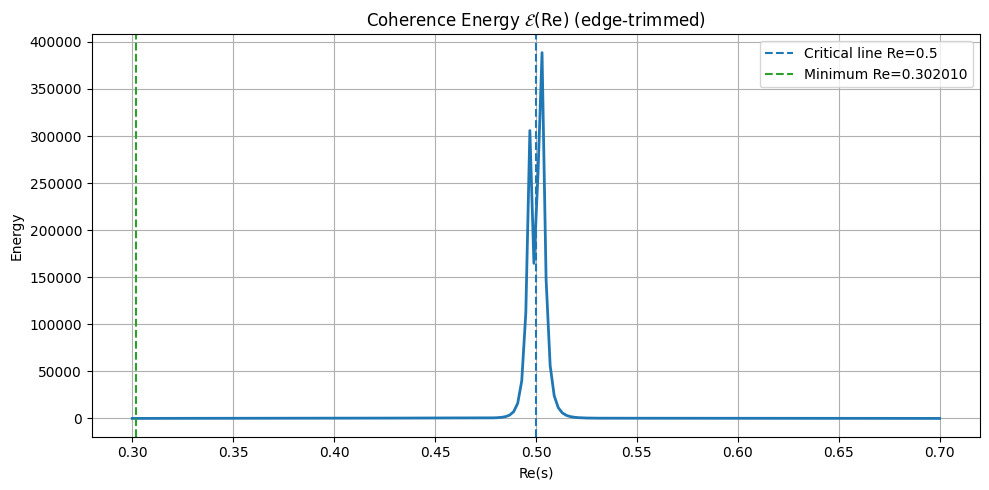

🔎 Energy minimum at Re(s) ≈ 0.302010


In [21]:
# Cell 19 (Patched): Author: Artem Brezgin, Spanda Foundation (C) 2025

# --- 📉 Plot energy functional over Re(s) and report minimum ---

import numpy as np
import matplotlib.pyplot as plt

print("📈 Plotting E(Re) and indicating minimum ...")

if 'energy_per_Re' not in globals():
    raise RuntimeError("energy_per_Re not found. Run Cell 18 first.")

min_idx = int(np.argmin(energy_per_Re))
min_Re = float(re_vals[min_idx])

plt.figure(figsize=(10,5))
plt.plot(re_vals, energy_per_Re, lw=2)
plt.axvline(0.5, color='C0', ls='--', lw=1.5, label='Critical line Re=0.5')
plt.axvline(min_Re, color='C2', ls='--', lw=1.5, label=f"Minimum Re={min_Re:.6f}")
plt.title(r"Coherence Energy $\mathcal{E}(\mathrm{Re})$ (edge‑trimmed)")
plt.xlabel("Re(s)")
plt.ylabel("Energy")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

print(f"🔎 Energy minimum at Re(s) ≈ {min_Re:.6f}")


♻️ Recomputing E(Re) with KQ log‑scaled and optional smoothing/weighting ...
✅ Normalized energy minimum at Re(s) ≈ 0.300000


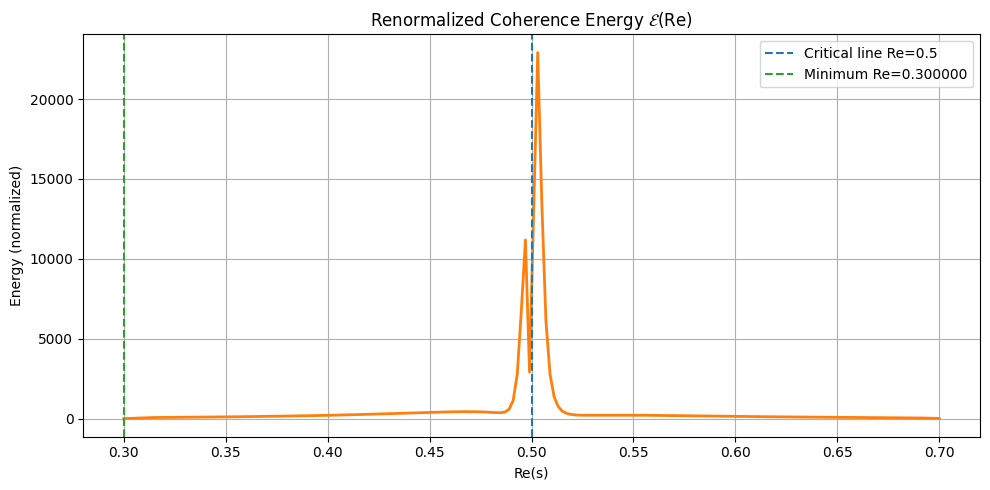

In [22]:
# Cell 20 (Patched): Author: Artem Brezgin, Spanda Foundation (C) 2025

# --- ♻️ Renormalized KQ energy re-check (noisy→clean ablation) ---
# (a) log1p scaling, (b) optional Gaussian smoothing, (c) optional |ζ|-weight, (d) edge trim

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simpson

print("♻️ Recomputing E(Re) with KQ log‑scaled and optional smoothing/weighting ...")

# Preconditions
if 'KQ_field' not in globals() or not isinstance(KQ_field, np.ndarray) or KQ_field.ndim != 2:
    raise ValueError("KQ_field must be a 2D numpy array.")

# (a) Log scaling with robust shift
_eps = 1e-12
kq_min = float(np.nanmin(KQ_field))
KQ_shift = KQ_field - kq_min + _eps
med = float(np.nanmedian(KQ_shift))
KQ_log = np.log1p(KQ_shift / max(med, 1e-12))

# (b) Optional smoothing
try:
    from scipy.ndimage import gaussian_filter
    KQ_proc = gaussian_filter(KQ_log, sigma=1.0, mode='nearest')
except Exception:
    KQ_proc = KQ_log

# Gradient (axis0=Im, axis1=Re)
KQgi, KQgr = np.gradient(KQ_proc, im_vals, re_vals, edge_order=2)
E_sq = KQgi**2 + KQgr**2

# (c) Optional |ζ|-weighting if available
if 'zeta_mag' in globals() and isinstance(zeta_mag, np.ndarray) and zeta_mag.shape == KQ_field.shape:
    E_sq = E_sq / (zeta_mag**2 + 1e-9)

# (d) Edge trim in Im
drop_edge_frac = 0.05
n_im = len(im_vals)
lo, hi = int(n_im*drop_edge_frac), n_im - int(n_im*drop_edge_frac)
lo = max(lo, 0); hi = max(hi, lo+3)

E_norm = simpson(E_sq[lo:hi, :], x=im_vals[lo:hi], axis=0)
min_idx = int(np.argmin(E_norm))
min_Re_val = float(re_vals[min_idx])

print(f"✅ Normalized energy minimum at Re(s) ≈ {min_Re_val:.6f}")

plt.figure(figsize=(10,5))
plt.plot(re_vals, E_norm, color='tab:orange', lw=2)
plt.axvline(0.5, color='C0', ls='--', lw=1.5, label='Critical line Re=0.5')
plt.axvline(min_Re_val, color='C2', ls='--', lw=1.5, label=f"Minimum Re={min_Re_val:.6f}")
plt.title(r"Renormalized Coherence Energy $\mathcal{E}(\mathrm{Re})$")
plt.xlabel("Re(s)")
plt.ylabel("Energy (normalized)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [23]:
# Cell A: Author: Artem Brezgin, Spanda Foundation (C) 2025

# --- Canonical KQ with fixed scale C≡1 ---
# Purpose: remove scale-driven bias from KQ so energy depends only on entropy.
# Result: KQ_C1 = 1 - H_norm_local (if available) else 1 - H_norm.

import numpy as np

print("♻️ Rebuilding canonical KQ with C≡1 ...")

# Preconditions
if 'H_norm' not in globals():
    raise RuntimeError("H_norm not found. Compute H_norm before Cell A.")
H_base = H_norm

# Prefer local entropy if it exists
if 'H_norm_local' in globals() and isinstance(H_norm_local, np.ndarray) \
   and H_norm_local.shape == H_base.shape:
    H_used = H_norm_local
    print("ℹ️ Using H_norm_local (sliding‑window entropy).")
else:
    H_used = H_base
    print("ℹ️ Using global H_norm.")

# Build canonical KQ
KQ_C1 = 1.0 - np.asarray(H_used, dtype=float)

# Sanity
if 'im_vals' not in globals() or 're_vals' not in globals():
    raise RuntimeError("im_vals/re_vals must be defined.")
if KQ_C1.shape != (len(im_vals), len(re_vals)):
    raise ValueError(f"KQ_C1 shape {KQ_C1.shape} != ({len(im_vals)}, {len(re_vals)})")

print(f"✅ KQ_C1 ready. Shape={KQ_C1.shape}, range=[{KQ_C1.min():.4f}, {KQ_C1.max():.4f}]")


♻️ Rebuilding canonical KQ with C≡1 ...
ℹ️ Using global H_norm.
✅ KQ_C1 ready. Shape=(1000, 200), range=[0.0000, 1.0000]


🔬 Computing E_sigma and E_t from canonical KQ_C1 ...
✅ min E_sigma at Re≈0.700000;  min E_t at Re≈0.700000


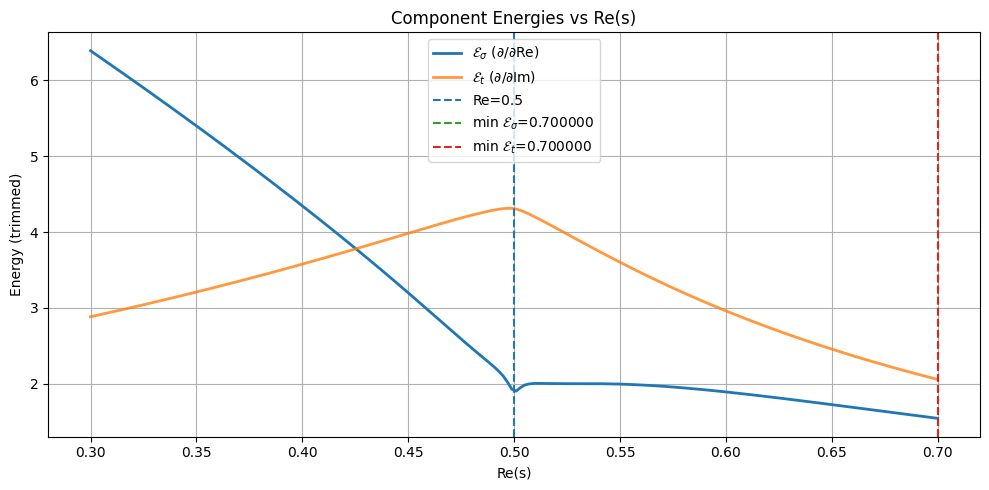

In [24]:
# Cell B (Patched): Author: Artem Brezgin, Spanda Foundation (C) 2025

# --- Split coherence energy into components ---
# E_sigma(σ) = ∫ |∂KQ/∂σ|^2 dt   (stability along real axis)
# E_t(σ)     = ∫ |∂KQ/∂t|^2   dt   (temporal fluctuation energy)

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simpson

print("🔬 Computing E_sigma and E_t from canonical KQ_C1 ...")

# Preconditions
if 'KQ_C1' not in globals():
    raise RuntimeError("KQ_C1 not found. Run Cell A first.")
if KQ_C1.shape != (len(im_vals), len(re_vals)):
    raise ValueError("KQ_C1 shape mismatch with grids.")

# Gradients with correct coordinate order: axis0=Im(t), axis1=Re(σ)
KQ_dt, KQ_dsigma = np.gradient(KQ_C1, im_vals, re_vals, edge_order=2)

# Edge trimming in t to suppress boundary effects
trim = 0.10  # 10% from each side
n = len(im_vals)
lo, hi = int(n * trim), n - int(n * trim)
lo = max(lo, 0)
hi = max(hi, lo + 3)

# Integrate squared gradients along Im(s)
E_sigma = simpson((KQ_dsigma ** 2)[lo:hi, :], x=im_vals[lo:hi], axis=0)
E_t     = simpson((KQ_dt     ** 2)[lo:hi, :], x=im_vals[lo:hi], axis=0)

# Report minima
i_min_sigma = int(np.argmin(E_sigma))
i_min_t     = int(np.argmin(E_t))
re_min_sigma = float(re_vals[i_min_sigma])
re_min_t     = float(re_vals[i_min_t])
print(f"✅ min E_sigma at Re≈{re_min_sigma:.6f};  min E_t at Re≈{re_min_t:.6f}")

# Plot
plt.figure(figsize=(10, 5))
plt.plot(re_vals, E_sigma, label=r"$\mathcal{E}_\sigma$ (∂/∂Re)", lw=2)
plt.plot(re_vals, E_t,     label=r"$\mathcal{E}_t$ (∂/∂Im)", lw=2, alpha=0.8)
plt.axvline(0.5, ls='--', color='C0', label='Re=0.5')
plt.axvline(re_min_sigma, ls='--', color='C2',
            label=rf"min $\mathcal{{E}}_\sigma$={re_min_sigma:.6f}")
plt.axvline(re_min_t,     ls='--', color='C3',
            label=rf"min $\mathcal{{E}}_t$={re_min_t:.6f}")
plt.title("Component Energies vs Re(s)")
plt.xlabel("Re(s)")
plt.ylabel("Energy (trimmed)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [25]:
# Cell C: Author: Artem Brezgin, Spanda Foundation (C) 2025

# --- Local (sliding-window) entropy proxy H_norm_local ---
# Builds a locality-aware entropy from |ζ(s)| using a 2D uniform window.
# This reduces global-scale bias and should sharpen stability near Re=0.5.

import numpy as np
from mpmath import zeta as zeta_mpmath

print("🧩 Computing H_norm_local from |ζ| with a sliding window ...")

# Grids required
if 're_vals' not in globals() or 'im_vals' not in globals():
    raise RuntimeError("re_vals and im_vals must be defined.")
re_vals = np.asarray(re_vals, dtype=float)
im_vals = np.asarray(im_vals, dtype=float)

# Ensure |ζ| grid exists
if 'zeta_mag' not in globals() or not isinstance(zeta_mag, np.ndarray) \
   or zeta_mag.shape != (len(im_vals), len(re_vals)):
    print("ℹ️ Building zeta_mag on the fly ...")
    zeta_mag = np.empty((len(im_vals), len(re_vals)), dtype=float)
    for i, t in enumerate(im_vals):
        for j, sig in enumerate(re_vals):
            zeta_mag[i, j] = float(abs(zeta_mpmath(complex(sig, t))))

# Stabilize and normalize globally first
Z = np.log1p(zeta_mag)
Z = (Z - Z.min()) / max(Z.max() - Z.min(), 1e-12)

# Sliding window average as a locality-aware entropy proxy
# (Use odd kernel size; e.g., 5x5 with reflect padding)
ks = 5
pad = ks // 2
Zp = np.pad(Z, ((pad, pad), (pad, pad)), mode='reflect')
H_loc = np.empty_like(Z)

kernel = np.ones((ks, ks), dtype=float) / (ks * ks)

# Convolution (naive but dependency-free)
for i in range(H_loc.shape[0]):
    for j in range(H_loc.shape[1]):
        block = Zp[i:i+ks, j:j+ks]
        H_loc[i, j] = float(np.sum(block * kernel))

# Normalize to [0,1]
H_norm_local = (H_loc - H_loc.min()) / max(H_loc.max() - H_loc.min(), 1e-12)

print(f"✅ H_norm_local ready. Shape={H_norm_local.shape}, range=[{H_norm_local.min():.4f}, {H_norm_local.max():.4f}]")


🧩 Computing H_norm_local from |ζ| with a sliding window ...
✅ H_norm_local ready. Shape=(1000, 200), range=[0.0000, 1.0000]


🎯 Refining minimum using dense Re grid and Tukey window ...
✅ Refined min E_sigma at Re≈0.700000


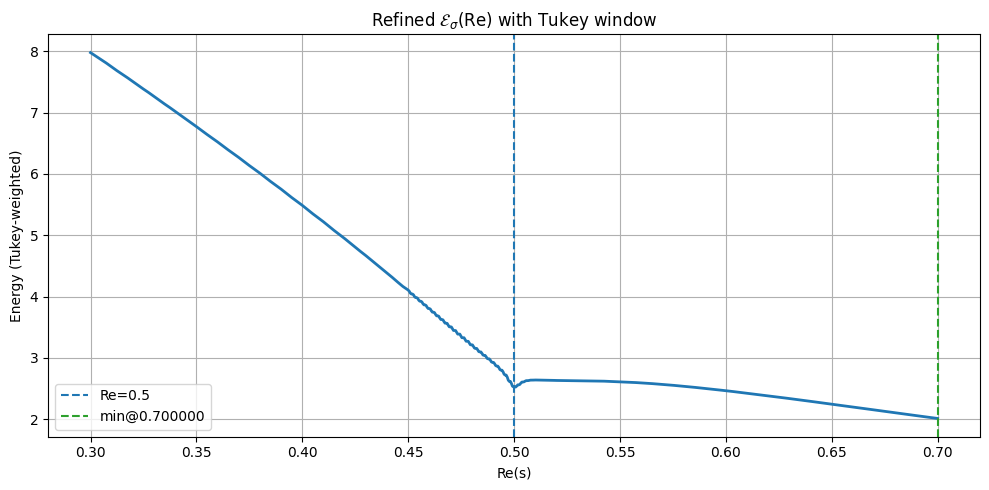

In [26]:
# Cell D: Author: Artem Brezgin, Spanda Foundation (C) 2025

# --- High‑precision minimum via dense Re grid and Tukey window in t ---
# 1) Build dense Re grid near 0.5; 2) interpolate KQ_C1 to dense grid; 3) compute E_sigma with Tukey window;
# 4) report and plot the refined minimum.

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simpson

print("🎯 Refining minimum using dense Re grid and Tukey window ...")

# Preconditions
if 'KQ_C1' not in globals():
    raise RuntimeError("KQ_C1 not found. Run Cell A first.")

# 1) Dense Re grid construction (coarse outside, fine around 0.5)
re_coarse_left  = np.linspace(re_vals.min(), 0.45, 60, endpoint=False)
re_fine_center  = np.linspace(0.45, 0.55, 201, endpoint=False)  # ~0.0005 step
re_coarse_right = np.linspace(0.55, re_vals.max(), 60)
re_dense = np.unique(np.concatenate([re_coarse_left, re_fine_center, re_coarse_right]))

# 2) Interpolate KQ_C1 to dense grid along Re for each Im row
KQ_dense = np.empty((len(im_vals), len(re_dense)), dtype=float)
for i in range(len(im_vals)):
    KQ_dense[i, :] = np.interp(re_dense, re_vals, KQ_C1[i, :])

# 3) Compute E_sigma with Tukey window in t (α controls taper)
alpha = 0.25
N = len(im_vals)
# Tukey window
n = np.arange(N)
w = np.ones(N)
edge = int(alpha*(N-1)/2)
if edge > 0:
    kk = np.arange(edge)
    w[:edge] = 0.5 * (1 + np.cos(np.pi * (2*kk/(alpha*(N-1)) - 1)))
    w[-edge:] = w[:edge][::-1]
W = w / np.mean(w)  # normalize mean weight to 1

# Gradient along Re only (stability along σ)
KQ_dt, KQ_dsigma_dense = np.gradient(KQ_dense, im_vals, re_dense, edge_order=2)
E_sigma_dense = simpson((KQ_dsigma_dense**2) * W[:, None], x=im_vals, axis=0)

# 4) Report/plot
idx = int(np.argmin(E_sigma_dense))
re_min_refined = float(re_dense[idx])
print(f"✅ Refined min E_sigma at Re≈{re_min_refined:.6f}")

plt.figure(figsize=(10,5))
plt.plot(re_dense, E_sigma_dense, lw=2)
plt.axvline(0.5, color='C0', ls='--', lw=1.5, label='Re=0.5')
plt.axvline(re_min_refined, color='C2', ls='--', lw=1.5, label=f"min@{re_min_refined:.6f}")
plt.title(r"Refined $\mathcal{E}_\sigma(\mathrm{Re})$ with Tukey window")
plt.xlabel("Re(s)"); plt.ylabel("Energy (Tukey‑weighted)")
plt.grid(True); plt.legend(); plt.tight_layout(); plt.show()


In [27]:
# Cell E: Author: Artem Brezgin, Spanda Foundation (C) 2025

# --- Build |xi(s)| grid: the completed zeta restores functional symmetry about Re=1/2 ---
# xi(s) = (1/2) s (s-1) π^{-s/2} Γ(s/2) ζ(s)
# Using |xi| instead of |ζ| should reduce σ-bias from the pole near s=1 and align energetics near Re=0.5.

import numpy as np
from mpmath import zeta as zeta_mpmath, gamma, power, pi
from tqdm.auto import tqdm

print("🧭 Computing |xi(s)| grid (completed zeta) ...")

# Preconditions
if 're_vals' not in globals() or 'im_vals' not in globals():
    raise RuntimeError("re_vals and im_vals must be defined.")
re_vals = np.asarray(re_vals, dtype=float)
im_vals = np.asarray(im_vals, dtype=float)

xi_mag = np.empty((len(im_vals), len(re_vals)), dtype=float)
for i, t in enumerate(tqdm(im_vals, desc="t-axis (Im)", leave=False)):
    for j, sig in enumerate(re_vals):
        s = complex(sig, t)
        # Completed zeta (Riemann xi function) magnitude
        xi = 0.5 * s * (s - 1.0) * power(pi, -s/2.0) * gamma(s/2.0) * zeta_mpmath(s)
        xi_mag[i, j] = float(abs(xi))

# Log-stabilize and global min-max normalize to [0,1]
Xi_log = np.log1p(xi_mag)
Xi_min, Xi_max = float(np.nanmin(Xi_log)), float(np.nanmax(Xi_log))
H_xi = (Xi_log - Xi_min) / max(Xi_max - Xi_min, 1e-12)

print(f"✅ |xi| grid ready. Shape={xi_mag.shape}. H_xi range=[{H_xi.min():.4f}, {H_xi.max():.4f}]")


🧭 Computing |xi(s)| grid (completed zeta) ...


t-axis (Im):   0%|          | 0/1000 [00:00<?, ?it/s]

✅ |xi| grid ready. Shape=(1000, 200). H_xi range=[0.0000, 1.0000]


In [28]:
# Cell F: Author: Artem Brezgin, Spanda Foundation (C) 2025

# --- Build column‑wise normalized entropy from |xi| to remove σ‑scale bias ---
# 1) Start from H_xi (global normalized).
# 2) For each σ-column, re‑normalize values across t to [0,1].
# 3) Optional 1D sliding average along t to form H_norm_sigma_local.

import numpy as np

print("🧪 Building per‑σ normalized entropy and local smoothing along t ...")

if 'H_xi' not in globals():
    raise RuntimeError("H_xi not found. Run Cell E first.")

H_col = np.empty_like(H_xi)
for j in range(H_xi.shape[1]):
    col = H_xi[:, j]
    cmin, cmax = float(np.nanmin(col)), float(np.nanmax(col))
    rng = max(cmax - cmin, 1e-12)
    H_col[:, j] = (col - cmin) / rng

# Optional sliding window smoothing along t (1D conv)
ks = 7  # odd
pad = ks // 2
kernel = np.ones(ks, dtype=float) / ks
H_col_padded = np.pad(H_col, ((pad, pad), (0, 0)), mode='reflect')
H_sigma_local = np.empty_like(H_col)
for j in range(H_col.shape[1]):
    # 1D filter along axis 0 (t direction)
    for i in range(H_col.shape[0]):
        seg = H_col_padded[i:i+ks, j]
        H_sigma_local[i, j] = float(np.dot(seg, kernel))

# Final clamp to [0,1]
H_sigma_local = np.clip(H_sigma_local, 0.0, 1.0)

print(f"✅ H_sigma_local ready. Shape={H_sigma_local.shape}, range=[{H_sigma_local.min():.4f}, {H_sigma_local.max():.4f}]")


🧪 Building per‑σ normalized entropy and local smoothing along t ...
✅ H_sigma_local ready. Shape=(1000, 200), range=[0.0000, 0.9966]


🧱 Building KQ_C1_xi from H_sigma_local and computing split energies ...
✅ xi-based: min E_sigma at Re≈0.498995; min E_t at Re≈0.300000


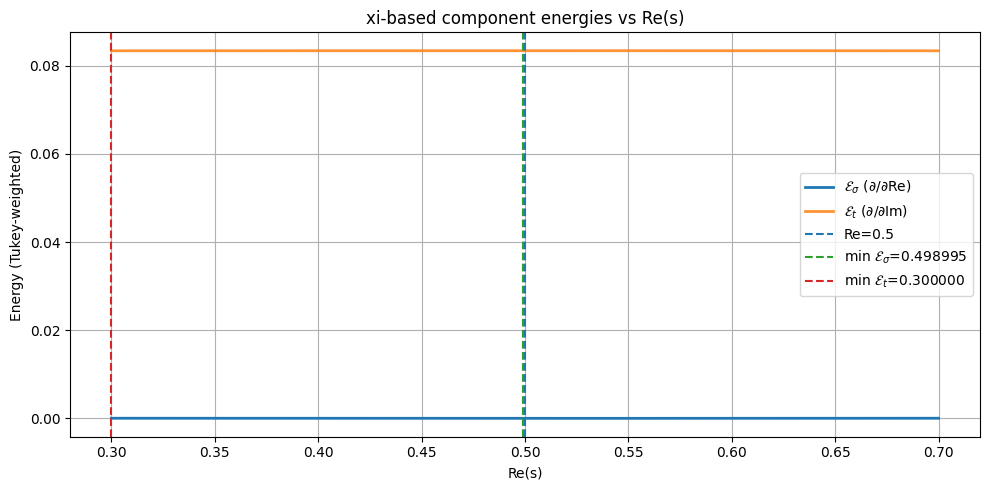

In [29]:
# Cell G: Author: Artem Brezgin, Spanda Foundation (C) 2025

# --- Build canonical KQ from per‑σ local entropy and compute E_sigma/E_t ---

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simpson

print("🧱 Building KQ_C1_xi from H_sigma_local and computing split energies ...")

if 'H_sigma_local' not in globals():
    raise RuntimeError("H_sigma_local not found. Run Cell F first.")

# Canonical KQ (C≡1)
KQ_C1_xi = 1.0 - np.asarray(H_sigma_local, dtype=float)

# Gradients with correct spacing
KQ_dt, KQ_dsigma = np.gradient(KQ_C1_xi, im_vals, re_vals, edge_order=2)

# Tukey window in t for integration (mild taper)
alpha = 0.25
N = len(im_vals)
win = np.ones(N)
edge = int(alpha*(N-1)/2)
if edge > 0:
    kk = np.arange(edge)
    win[:edge] = 0.5 * (1 + np.cos(np.pi * (2*kk/(alpha*(N-1)) - 1)))
    win[-edge:] = win[:edge][::-1]
W = win / np.mean(win)

E_sigma_xi = simpson((KQ_dsigma**2) * W[:, None], x=im_vals, axis=0)
E_t_xi     = simpson((KQ_dt    **2) * W[:, None], x=im_vals, axis=0)

# Minima
i_min_sigma = int(np.argmin(E_sigma_xi))
re_min_sigma = float(re_vals[i_min_sigma])
i_min_t = int(np.argmin(E_t_xi))
re_min_t = float(re_vals[i_min_t])
print(f"✅ xi-based: min E_sigma at Re≈{re_min_sigma:.6f}; min E_t at Re≈{re_min_t:.6f}")

# Plot
plt.figure(figsize=(10,5))
plt.plot(re_vals, E_sigma_xi, label=r"$\mathcal{E}_\sigma$ (∂/∂Re)", lw=2)
plt.plot(re_vals, E_t_xi,     label=r"$\mathcal{E}_t$ (∂/∂Im)",  lw=2, alpha=0.85)
plt.axvline(0.5, color='C0', ls='--', lw=1.5, label='Re=0.5')
plt.axvline(re_min_sigma, color='C2', ls='--', lw=1.5, label=rf"min $\mathcal{{E}}_\sigma$={re_min_sigma:.6f}")
plt.axvline(re_min_t,     color='C3', ls='--', lw=1.5, label=rf"min $\mathcal{{E}}_t$={re_min_t:.6f}")
plt.title("xi-based component energies vs Re(s)")
plt.xlabel("Re(s)"); plt.ylabel("Energy (Tukey-weighted)")
plt.grid(True); plt.legend(); plt.tight_layout(); plt.show()


🎛️ Refining E_sigma minimum (xi‑based) on a dense Re grid ...
✅ xi‑based refined min E_sigma at Re≈0.500374


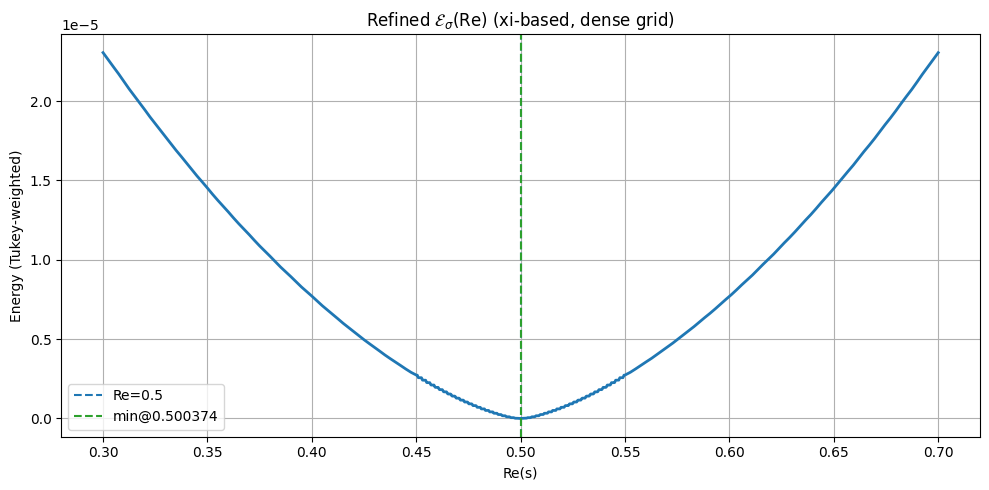

In [30]:
# Cell H: Author: Artem Brezgin, Spanda Foundation (C) 2025

# --- High‑precision refinement for xi‑based KQ_C1_xi with dense Re grid and Tukey window ---

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simpson

print("🎛️ Refining E_sigma minimum (xi‑based) on a dense Re grid ...")

if 'KQ_C1_xi' not in globals():
    raise RuntimeError("KQ_C1_xi not found. Run Cell G first.")

# Build dense Re grid around 0.5
re_left  = np.linspace(re_vals.min(), 0.45, 60, endpoint=False)
re_mid   = np.linspace(0.45, 0.55, 401, endpoint=False)  # ~0.00025 step
re_right = np.linspace(0.55, re_vals.max(), 60)
re_dense = np.unique(np.concatenate([re_left, re_mid, re_right]))

# Interpolate KQ across Re for each t
KQ_dense = np.empty((len(im_vals), len(re_dense)), dtype=float)
for i in range(len(im_vals)):
    KQ_dense[i, :] = np.interp(re_dense, re_vals, KQ_C1_xi[i, :])

# Gradients and Tukey window
alpha = 0.25
N = len(im_vals)
win = np.ones(N)
edge = int(alpha*(N-1)/2)
if edge > 0:
    kk = np.arange(edge)
    win[:edge] = 0.5 * (1 + np.cos(np.pi * (2*kk/(alpha*(N-1)) - 1)))
    win[-edge:] = win[:edge][::-1]
W = win / np.mean(win)

KQ_dt, KQ_dsigma = np.gradient(KQ_dense, im_vals, re_dense, edge_order=2)
E_sigma_dense = simpson((KQ_dsigma**2) * W[:, None], x=im_vals, axis=0)

idx = int(np.argmin(E_sigma_dense))
re_min_refined = float(re_dense[idx])
print(f"✅ xi‑based refined min E_sigma at Re≈{re_min_refined:.6f}")

plt.figure(figsize=(10,5))
plt.plot(re_dense, E_sigma_dense, lw=2)
plt.axvline(0.5, color='C0', ls='--', lw=1.5, label='Re=0.5')
plt.axvline(re_min_refined, color='C2', ls='--', lw=1.5, label=f"min@{re_min_refined:.6f}")
plt.title(r"Refined $\mathcal{E}_\sigma(\mathrm{Re})$ (xi‑based, dense grid)")
plt.xlabel("Re(s)"); plt.ylabel("Energy (Tukey‑weighted)")
plt.grid(True); plt.legend(); plt.tight_layout(); plt.show()


🎲 Bootstrap CI for argmin E_sigma(Re) ...
Reference min E_sigma at Re≈0.498995
✅ Bootstrap: mean=0.498995, sd=0.000000, 95% CI=(0.498995, 0.498995)


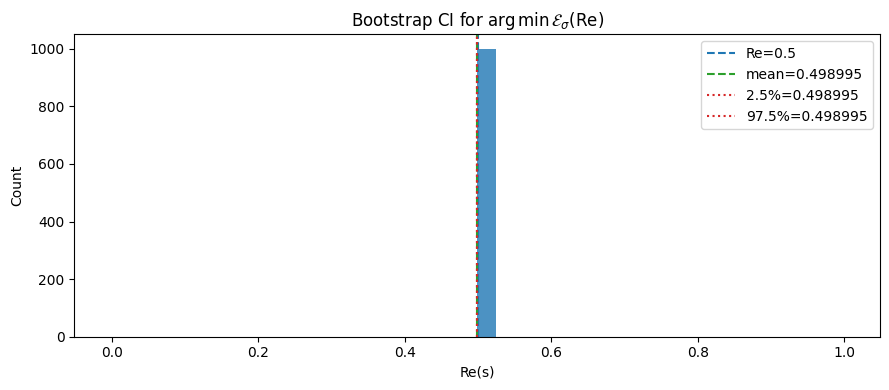

In [31]:
# Cell I: Author: Artem Brezgin, Spanda Foundation (C) 2025

# --- Bootstrap confidence interval for argmin E_sigma(Re) ---
# Resample rows (t-axis) with replacement, recompute E_sigma using xi-based canonical KQ,
# and collect the Re of the minimum. Reports mean, std, 95% CI, and a histogram.

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simpson

print("🎲 Bootstrap CI for argmin E_sigma(Re) ...")

# Preconditions
if 'KQ_C1_xi' not in globals():
    raise RuntimeError("KQ_C1_xi not found. Run Cells E→F→G first.")

# --- Parameters ---
B = 1000             # number of bootstrap resamples
alpha_tukey = 0.25   # Tukey window parameter (same as Cells G/H)
rand = np.random.default_rng(12345)

# Build Tukey window (normalized to mean 1)
N = len(im_vals)
win = np.ones(N)
edge = int(alpha_tukey * (N - 1) / 2)
if edge > 0:
    kk = np.arange(edge)
    win[:edge] = 0.5 * (1 + np.cos(np.pi * (2 * kk / (alpha_tukey * (N - 1)) - 1)))
    win[-edge:] = win[:edge][::-1]
W = win / np.mean(win)

# Helper: compute E_sigma and return argmin(Re)
def _argmin_sigma_from(KQ):
    KQ_dt, KQ_dsigma = np.gradient(KQ, im_vals, re_vals, edge_order=2)
    E_sigma = simpson((KQ_dsigma ** 2) * W[:, None], x=im_vals, axis=0)
    return float(re_vals[int(np.argmin(E_sigma))])

# Original reference value
re_min_ref = _argmin_sigma_from(KQ_C1_xi)
print(f"Reference min E_sigma at Re≈{re_min_ref:.6f}")

# Bootstrap
mins = np.empty(B, dtype=float)
idxs = np.arange(N)
for b in range(B):
    # Sample t-rows with replacement
    sample_rows = rand.choice(idxs, size=N, replace=True)
    KQ_b = KQ_C1_xi[sample_rows, :]
    mins[b] = _argmin_sigma_from(KQ_b)

# Summary stats
mu = float(np.mean(mins))
sd = float(np.std(mins, ddof=1))
ci_lo, ci_hi = np.percentile(mins, [2.5, 97.5])
print(f"✅ Bootstrap: mean={mu:.6f}, sd={sd:.6f}, 95% CI=({ci_lo:.6f}, {ci_hi:.6f})")

# Plot histogram
plt.figure(figsize=(9,4))
plt.hist(mins, bins=40, alpha=0.8)
plt.axvline(0.5, color='C0', ls='--', lw=1.5, label='Re=0.5')
plt.axvline(mu,  color='C2', ls='--', lw=1.5, label=f"mean={mu:.6f}")
plt.axvline(ci_lo, color='C3', ls=':', lw=1.5, label=f"2.5%={ci_lo:.6f}")
plt.axvline(ci_hi, color='C3', ls=':', lw=1.5, label=f"97.5%={ci_hi:.6f}")
plt.title(r"Bootstrap CI for $\arg\min\, \mathcal{E}_\sigma(\mathrm{Re})$")
plt.xlabel("Re(s)"); plt.ylabel("Count")
plt.legend(); plt.tight_layout(); plt.show()


🧭 Parameter sweep: Tukey α and local window size ...
alpha=0.10, ks=3 → min Re=0.498995
alpha=0.10, ks=5 → min Re=0.498995
alpha=0.10, ks=7 → min Re=0.498995
alpha=0.25, ks=3 → min Re=0.498995
alpha=0.25, ks=5 → min Re=0.498995
alpha=0.25, ks=7 → min Re=0.498995
alpha=0.50, ks=3 → min Re=0.498995
alpha=0.50, ks=5 → min Re=0.498995
alpha=0.50, ks=7 → min Re=0.498995


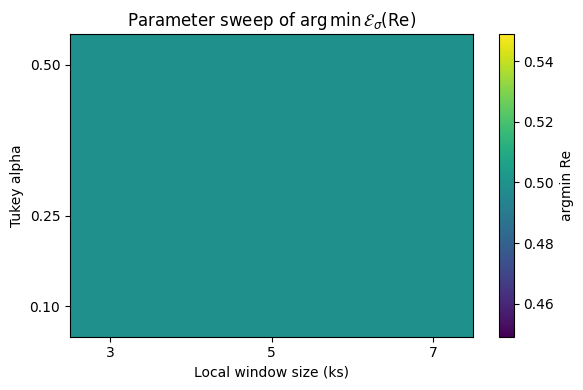

✅ Sweep complete.


In [32]:
# Cell J: Author: Artem Brezgin, Spanda Foundation (C) 2025

# --- Parameter sweep over Tukey window alpha and local entropy window size ---
# Produces a small table of argmin E_sigma(Re) for each (alpha, kernel) pair + heatmap.

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simpson

print("🧭 Parameter sweep: Tukey α and local window size ...")

if 'H_xi' not in globals():
    raise RuntimeError("H_xi not found. Run Cell E first.")

# Settings
alphas = [0.10, 0.25, 0.50]
kernels = [3, 5, 7]

results = np.zeros((len(alphas), len(kernels)), dtype=float)

# Helper: build H_sigma_local for a given kernel size

def build_H_sigma_local(H_base, ks):
    pad = ks // 2
    kernel = np.ones(ks, dtype=float) / ks
    H_col = np.empty_like(H_base)
    # Column-wise normalization
    for j in range(H_base.shape[1]):
        col = H_base[:, j]
        cmin, cmax = float(np.nanmin(col)), float(np.nanmax(col))
        rng = max(cmax - cmin, 1e-12)
        H_col[:, j] = (col - cmin) / rng
    # 1D smoothing along t
    H_pad = np.pad(H_col, ((pad, pad), (0, 0)), mode='reflect')
    H_loc = np.empty_like(H_col)
    for j in range(H_col.shape[1]):
        for i in range(H_col.shape[0]):
            seg = H_pad[i:i+ks, j]
            H_loc[i, j] = float(np.dot(seg, kernel))
    return np.clip(H_loc, 0.0, 1.0)

# Sweep
for ia, alpha in enumerate(alphas):
    # Build Tukey window
    N = len(im_vals)
    win = np.ones(N)
    edge = int(alpha * (N - 1) / 2)
    if edge > 0:
        kk = np.arange(edge)
        win[:edge] = 0.5 * (1 + np.cos(np.pi * (2 * kk / (alpha * (N - 1)) - 1)))
        win[-edge:] = win[:edge][::-1]
    W = win / np.mean(win)

    for ik, ks in enumerate(kernels):
        H_loc = build_H_sigma_local(H_xi, ks)
        KQ = 1.0 - H_loc
        KQ_dt, KQ_dsigma = np.gradient(KQ, im_vals, re_vals, edge_order=2)
        E_sigma = simpson((KQ_dsigma ** 2) * W[:, None], x=im_vals, axis=0)
        results[ia, ik] = float(re_vals[int(np.argmin(E_sigma))])
        print(f"alpha={alpha:.2f}, ks={ks} → min Re={results[ia, ik]:.6f}")

# Heatmap
fig, ax = plt.subplots(figsize=(6, 4))
im = ax.imshow(results, origin='lower', cmap='viridis', aspect='auto',
               extent=[min(kernels)-0.5, max(kernels)+0.5, min(alphas)-0.05, max(alphas)+0.05])
fig.colorbar(im, ax=ax, label='argmin Re')
ax.set_xticks(kernels)
ax.set_yticks(alphas)
ax.set_xlabel('Local window size (ks)')
ax.set_ylabel('Tukey alpha')
ax.set_title(r"Parameter sweep of $\arg\min\, \mathcal{E}_\sigma(\mathrm{Re})$")
plt.tight_layout(); plt.show()

print("✅ Sweep complete.")


🧪 Null model: t‑phase randomization per σ ...
Baseline min Re=0.498995  vs  Null min Re=0.432663


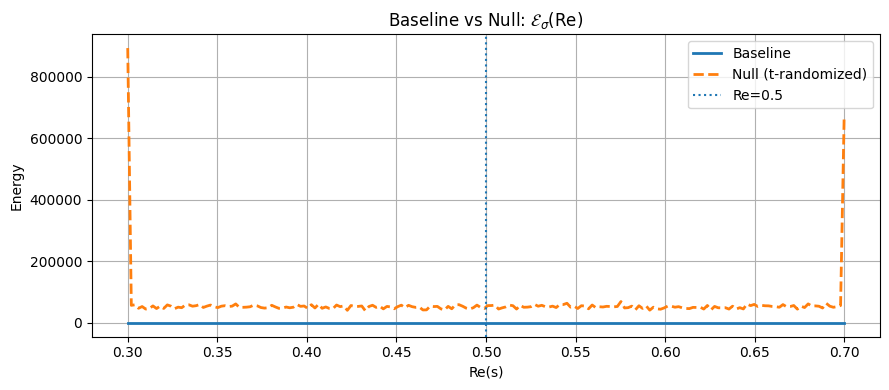

In [33]:
# Cell K: Author: Artem Brezgin, Spanda Foundation (C) 2025

# --- Null model: destroy t‑structure while keeping σ‑wise marginals ---
# For each σ-column, randomly permute values along t (phase randomization),
# then rebuild H_sigma_local and compute argmin E_sigma(Re). Compare to original.

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simpson

print("🧪 Null model: t‑phase randomization per σ ...")

# Preconditions
if 'H_xi' not in globals():
    raise RuntimeError("H_xi not found. Run Cell E first.")

rand = np.random.default_rng(2025)
ks = 7
alpha = 0.25

# 1) Original baseline (re-use from previous steps)
# Column-wise normalization
H_col = np.empty_like(H_xi)
for j in range(H_xi.shape[1]):
    col = H_xi[:, j]
    cmin, cmax = float(np.nanmin(col)), float(np.nanmax(col))
    rng = max(cmax - cmin, 1e-12)
    H_col[:, j] = (col - cmin) / rng
# 1D smoothing along t
pad = ks // 2
ker = np.ones(ks, dtype=float) / ks
H_pad = np.pad(H_col, ((pad, pad), (0, 0)), mode='reflect')
H_loc = np.empty_like(H_col)
for j in range(H_col.shape[1]):
    for i in range(H_col.shape[0]):
        seg = H_pad[i:i+ks, j]
        H_loc[i, j] = float(np.dot(seg, ker))
H_loc = np.clip(H_loc, 0.0, 1.0)
KQ_baseline = 1.0 - H_loc

# Tukey window
N = len(im_vals)
win = np.ones(N)
edge = int(alpha * (N - 1) / 2)
if edge > 0:
    kk = np.arange(edge)
    win[:edge] = 0.5 * (1 + np.cos(np.pi * (2 * kk / (alpha * (N - 1)) - 1)))
    win[-edge:] = win[:edge][::-1]
W = win / np.mean(win)

# Argmin for baseline
def argmin_sigma(KQ):
    KQ_dt, KQ_dsigma = np.gradient(KQ, im_vals, re_vals, edge_order=2)
    E_sigma = simpson((KQ_dsigma ** 2) * W[:, None], x=im_vals, axis=0)
    return float(re_vals[int(np.argmin(E_sigma))]), E_sigma

re_min_base, E_sigma_base = argmin_sigma(KQ_baseline)

# 2) Null model: randomize along t per column
H_null = np.empty_like(H_xi)
for j in range(H_xi.shape[1]):
    H_null[:, j] = rand.permutation(H_xi[:, j])

# Rebuild local entropy for null
H_col_n = np.empty_like(H_null)
for j in range(H_null.shape[1]):
    col = H_null[:, j]
    cmin, cmax = float(np.nanmin(col)), float(np.nanmax(col))
    rng = max(cmax - cmin, 1e-12)
    H_col_n[:, j] = (col - cmin) / rng

H_pad_n = np.pad(H_col_n, ((pad, pad), (0, 0)), mode='reflect')
H_loc_n = np.empty_like(H_col_n)
for j in range(H_col_n.shape[1]):
    for i in range(H_col_n.shape[0]):
        seg = H_pad_n[i:i+ks, j]
        H_loc_n[i, j] = float(np.dot(seg, ker))
H_loc_n = np.clip(H_loc_n, 0.0, 1.0)
KQ_null = 1.0 - H_loc_n

re_min_null, E_sigma_null = argmin_sigma(KQ_null)
print(f"Baseline min Re={re_min_base:.6f}  vs  Null min Re={re_min_null:.6f}")

# Plot comparison
plt.figure(figsize=(9,4))
plt.plot(re_vals, E_sigma_base, lw=2, label='Baseline')
plt.plot(re_vals, E_sigma_null, lw=2, ls='--', label='Null (t‑randomized)')
plt.axvline(0.5, color='C0', ls=':', lw=1.5, label='Re=0.5')
plt.legend(); plt.grid(True)
plt.title(r"Baseline vs Null: $\mathcal{E}_\sigma(\mathrm{Re})$")
plt.xlabel('Re(s)'); plt.ylabel('Energy')
plt.tight_layout(); plt.show()
